# k-Nearest Neighbors

***

## Índice

1. [Importando bibliotecas](#importando-bibliotecas)
2. [Treinamento do modelo](#treinamento-do-modelo)
3. [Impacto do tamanho da vizinhança](#impacto-do-tamanho-da-vizinhança)
4. [Personalizando a medida de distância](#personalizando-a-medida-de-distância)

## Importando bibliotecas

In [10]:
# Bibliotecas de manipualção e visualização de dados
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Classes do modelo
from sklearn.svm import SVC, LinearSVC

# Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

# Função para carregar nosso dataset
from sklearn.datasets import load_wine

def show_decision_region(x, y, clf, f0, f1):
    plot_decision_regions(x, y, clf=clf)
    plt.xlabel(f0)
    plt.ylabel(f1)
    if clf.__class__.__name__ == "KNeighborsClassifier":
        plt.title(clf.__class__.__name__ + " k = " + str(clf.n_neighbors))
    else:
        plt.title(clf.__class__.__name__)
    plt.show()

# extracted from https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(
        X, 
        Y, 
        P, 
        colors='k',
        levels=[-1, 0, 1], 
        alpha=0.5,
        linestyles=['--', '-', '--']
    )
    
    # plot support vectors
    if plot_support:
        ax.scatter(
            model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=300, 
            linewidth=1, 
            facecolors='none'
        )

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## Treinamento do modelo

In [3]:
# carregando o dataset
X, y = load_wine(return_X_y=True, as_frame=True)

# vamos escolher apenas classes do dataset
class_a = 0
class_b = 1
class_0_instances = (y == class_a)
class_1_instances = (y == class_b)

filtered_y = y[class_0_instances | class_1_instances]
filtered_X = X[class_0_instances | class_1_instances]

# cores e simbolos para as classses
colors = {0: "steelblue", 1: "darkorange", 2: "mediumseagreen"}
markers = {0: "s", 1: "^", 2:"o"}

# vamos observar as duas features
feature_0 = "alcohol"
feature_1 = "color_intensity"

# dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(filtered_X[[feature_0, feature_1]], filtered_y, test_size=0.3, random_state=199)


Vamos utilizar uma das implementações do SVM no _sklearn_, o SVC. Aqui conseguimos controlar a penalização por instância errada (_C_) e os parâmetros de otimização do algoritmo, bem como seu _kernel_.

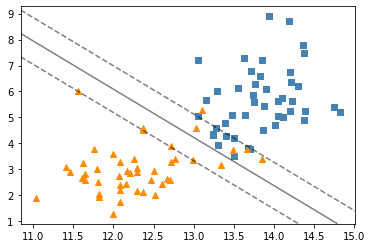

In [7]:
model = SVC(C=1e-10, kernel="linear")
model.fit(X_train, y_train)

plt.scatter(
    X_train[feature_0][class_0_instances],
    X_train[feature_1][class_0_instances], 
    c=colors[class_a], 
    marker=markers[class_a]
)
plt.scatter(
    X_train[feature_0][class_1_instances], 
    X_train[feature_1][class_1_instances], 
    c=colors[class_b], 
    marker=markers[class_b]
)

plot_svc_decision_function(model)

              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.82      0.92      0.87        25

    accuracy                           0.82        39
   macro avg       0.82      0.78      0.79        39
weighted avg       0.82      0.82      0.81        39



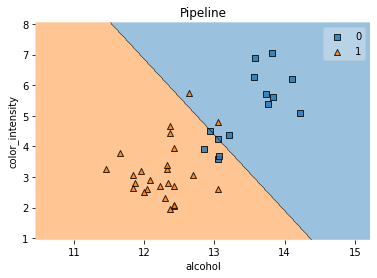

[[-3.05092044 -2.4736741 ]]
[2.58621461]


In [42]:
# vamos criar um classificador kNN com k=11
model = Pipeline(
    [("scaler", MinMaxScaler()),
    ("classifier", SVC(C=1, max_iter=10000, kernel='linear')),]
)
model.fit(X_train, y_train)

# e ver a sua performance no dataset de teste
print(classification_report(y_test, model.predict(X_test)))

show_decision_region(
    np.array(
        [
            X_test[feature_0].values, 
            X_test[feature_1].values,
        ]
    ).T, 
    y_test.values, 
    model, 
    feature_0, 
    feature_1
)

print(model["classifier"].coef_)
print(model["classifier"].intercept_)

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.88      0.92      0.90        25

    accuracy                           0.87        39
   macro avg       0.87      0.85      0.86        39
weighted avg       0.87      0.87      0.87        39



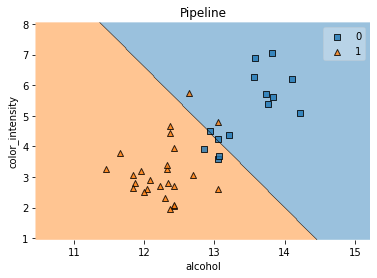

[[-2.80173692 -2.44686165]]
[2.42275264]


In [41]:
# vamos criar um classificador kNN com k=11
model = Pipeline(
    [("scaler", MinMaxScaler()),
    ("model", LinearSVC(C=1, max_iter=10000, loss='hinge')),]
)
model.fit(X_train, y_train)

# e ver a sua performance no dataset de teste
print(classification_report(y_test, model.predict(X_test)))

show_decision_region(
    np.array(
        [
            X_test[feature_0].values, 
            X_test[feature_1].values,
        ]
    ).T, 
    y_test.values, 
    model, 
    feature_0, 
    feature_1
)

print(model["model"].coef_)
print(model["model"].intercept_)

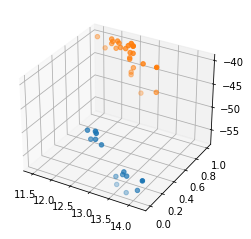

In [79]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# z = (X[class_0_instances][[feature_0, feature_1]].values * model["model"].coef_).sum(axis=1) + model["model"].intercept_
# ax.scatter(X[class_0_instances][feature_0].values, y[class_0_instances].values, z)

c0 = (y_test == class_a)
c1 = (y_test == class_b)

z = (X_test.values * model["model"].coef_).sum(axis=1) + model["model"].intercept_
ax.scatter(X_test[c0][feature_0].values, y_test[c0].values, z[c0])
ax.scatter(X_test[c1][feature_0].values, y_test[c1].values, z[c1])

plt.show()


# class_a = 0
# class_b = 1
# class_0_instances = (y == class_a)
# class_1_instances = (y == class_b)

# filtered_y = y_test[class_0_instances | class_1_instances]
# filtered_X = X_test[class_0_instances | class_1_instances]

# # vamos definir cores e simbolos para nossas classses
# colors = {0: "steelblue", 1: "darkorange", 2: "mediumseagreen"}
# markers = {0: "s", 1: "^", 2:"o"}

# # como duas classes estão distribuidas por duas features?
# feature_0 = "alcohol"
# feature_1 = "color_intensity"

# # vamos observar cada uma das classes usando duas features
# plt.scatter(
#     X[feature_0][class_0_instances],
#     X[feature_1][class_0_instances], 
#     c=colors[class_a], 
#     marker=markers[class_a]
# )
# plt.scatter(
#     X[feature_0][class_1_instances], 
#     X[feature_1][class_1_instances], 
#     c=colors[class_b], 
#     marker=markers[class_b]
# )

## Impacto do tamanho da vizinhança

Vamos voltar um pouco e rever como o dataset de treino se comporta.

In [ ]:
plt.scatter(
    X_train[feature_0][class_0_instances],
    X_train[feature_1][class_0_instances], 
    c=colors[class_a], 
    marker=markers[class_a]
)
plt.scatter(
    X_train[feature_0][class_1_instances], 
    X_train[feature_1][class_1_instances], 
    c=colors[class_b], 
    marker=markers[class_b]
)

Vemos que a classe triangulo laranja tem alguns exemplares bem próximos dos quadrados azuis. O que acontece se mudarmos o tamanho da vizinhança no nosso classificador?

Agora vamos observar a região de decisão, reduzindo o tamanho da vizinhança.

A medida em que a quantidade de vizinhos reduz, a região de decisão fica menos suave. Isso porque quanto menos vizinhos para decidir se uma instancia é de uma classe ou não, maior a sensibilidade do algoritmo.

Decidir o valor ideal para esse hiperparâmetro é depende de problema para problema. Para alguns datasets, um valor menor de vizinhos pode ser beneficial para diferenciar padrões com baixa ocorrência ou que estão próximos de outras classe com maior frequência. Entretanto, quanto menor a quantidade de vizinhos, maior é a chance do algoritmo ser afetado por ruído.

In [ ]:
for k in [11, 9, 7, 5, 3, 1]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    # e ver a sua performance no dataset de teste
    show_decision_region(
        np.stack(
            [
                X_test[feature_0].values, 
                X_test[feature_1].values,
            ],
            axis=1
        ), 
        y_test.values, 
        model, 
        feature_0, 
        feature_1
    )

## Personalizando a medida de distância

Também podemos mudar a métrica utilizada para calcular a distância entre as amostras.

O hiperparâmetro _metric_ pode assumir dois tipos diferentes, uma _string_ ou uma função. Caso o valor seja uma _string_, as possíveis funções de distâncias estão presentes [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric). Entretanto, você tamém pode criar uma função que calcula a distância entre métricas.

Vamos definir duas distâncias diferentes, a distância Euclidiana e a distância Manhattan:

- Manhattan: $D_M(x, y) = |x_1-x_2| + |y_1-y_2|$
- Euclidiana: $D(x, y) = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}$

In [ ]:
# vamos implementar a distância manhattan, com pesos diferentes para cada uma das features
def knn_custom_distance(x, y, weights=np.array([2, 1])):
    return (abs(x - y)*weights).sum()

model = KNeighborsClassifier(n_neighbors=11, metric=knn_custom_distance)
model.fit(X_train, y_train)

# e ver a sua performance no dataset de test
print(classification_report(y_test, model.predict(X_test)))

show_decision_region(
    np.array(
        [
            X_test[feature_0].values, 
            X_test[feature_1].values,
        ]
    ).T, 
    y_test.values, 
    model, 
    feature_0, 
    feature_1
)

O comportamento padrão do algoritmo atribui pesos iguais para as distâncias entre a instância de teste e as de treino. Entretanto, podemos atribuir pesos diferentes em função das distâncias. Isso pode ser feito mudando o hiperparâmetro _weights_ de três formas diferentes: 

- _"uniform"_ atribui o rótulo da classe majoritária dos k vizinhos da instancia de teste.
- _"distance"_ utiliza como peso o inverso da distância ($1/d$), dando peso menor instâncias mais longe da instancia de teste.
- E uma _função customizada_, onde você pode definir a função para atribuir pesos diferentes para um vetor de distâncias.

In [ ]:
# vamos criar um classificador kNN com k=11
model = KNeighborsClassifier(n_neighbors=11, weights="distance")
model.fit(X_train, y_train)

# e ver a sua performance no dataset de teste
print(classification_report(y_test, model.predict(X_test)))

show_decision_region(
    np.array(
        [
            X_test[feature_0].values, 
            X_test[feature_1].values,
        ]
    ).T, 
    y_test.values, 
    model, 
    feature_0, 
    feature_1
)